In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [130]:
# read csv file into a dataframe
df_richest = pd.read_csv('TopRichestInWorld.csv')


In [131]:
# list top 5 rows
df_richest.head()

,Name,NetWorth,Age,Country/Territory,Source,Industry
0,Elon Musk,"$219,000,000,000",50,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,"$171,000,000,000",58,United States,Amazon,Technology
2,Bernard Arnault & family,"$158,000,000,000",73,France,LVMH,Fashion & Retail
3,Bill Gates,"$129,000,000,000",66,United States,Microsoft,Technology
4,Warren Buffett,"$118,000,000,000",91,United States,Berkshire Hathaway,Finance & Investments


In [132]:
# list rows, then columns
df_richest.shape


(101, 6)

In [133]:
# list the column names
df_richest.columns

Index(['Name', 'NetWorth', 'Age', 'Country/Territory', 'Source', 'Industry'], dtype='object')

In [134]:
# list the column datatypes
df_richest.dtypes

Name                 object
NetWorth             object
Age                   int64
Country/Territory    object
Source               object
Industry             object
dtype: object

In [135]:
# get metadata in one command
df_richest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               101 non-null    object
 1   NetWorth           101 non-null    object
 2   Age                101 non-null    int64 
 3   Country/Territory  101 non-null    object
 4   Source             101 non-null    object
 5   Industry           101 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.9+ KB


In [136]:
# which industry had the most billionaires
industry = df_richest['Industry'].value_counts()
industry

Fashion & Retail         18
Technology               15
Finance & Investments    13
Metals & Mining           9
Food & Beverage           8
Automotive                7
Diversified               6
Manufacturing             5
Healthcare                5
Media & Entertainment     4
Real Estate               3
Telecom                   2
Logistics                 2
Energy                    2
Gambling & Casinos        1
Service                   1
Name: Industry, dtype: int64

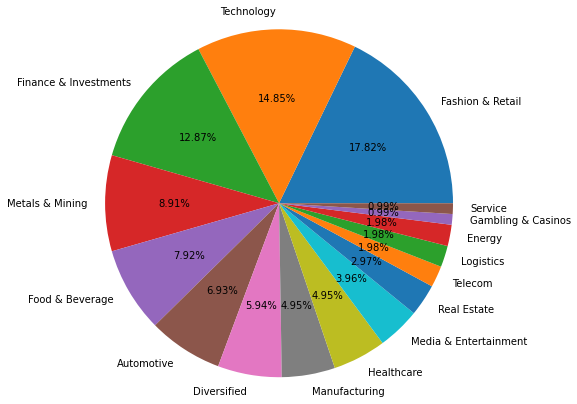

In [137]:
# Create a pie plot of the industries that had the most billionares
industry.plot(kind='pie', autopct='%.2f%%',title=None, radius=2, label = '')
plt.show()

In [138]:
# which country had the most billionares
country = df_richest['Country/Territory'].value_counts()

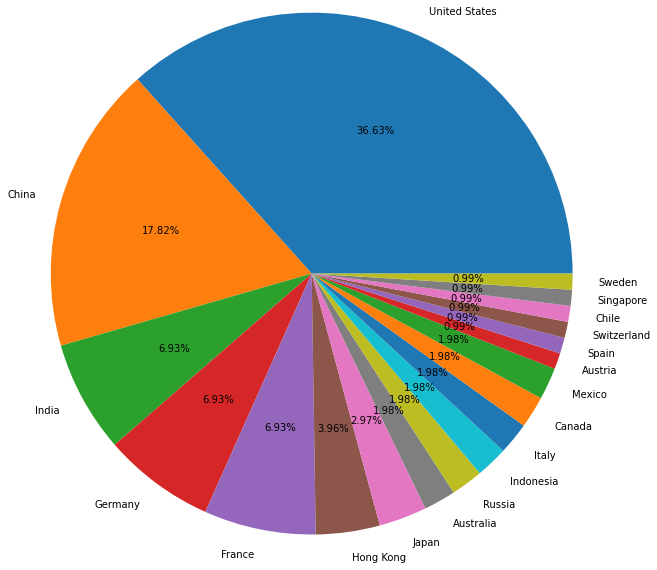

In [139]:
country.plot(kind='pie',autopct='%.2f%%',radius=3, label='')
plt.show()

In [140]:
# find which source developed the greatest number of billionaires
df_richest['Source'].value_counts()

mining            4
hedge funds       4
Walmart           3
real estate       3
Google            3
                 ..
Red Bull          1
eyeglasses        1
fashion retail    1
online games      1
chemicals         1
Name: Source, Length: 77, dtype: int64

In [141]:
df_richest['Age'].describe()

count    101.000000
mean      67.118812
std       13.892651
min       30.000000
25%       57.000000
50%       67.000000
75%       77.000000
max       94.000000
Name: Age, dtype: float64

In [142]:
df_me = df_richest.append({'Name':'babarehner', 'NetWorth':'$100,000', 'Age':30, 'Country/Territory':'United States', 
                   'Source':'Google', 'Industry':'Technology'}, ignore_index=True)

/tmp/ipykernel_35857/2430131774.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_me = df_richest.append({'Name':'babarehner', 'NetWorth':'$100,000', 'Age':30, 'Country/Territory':'United States',


In [143]:
# Remove the '$' sign in 'NetWorth' column
df_me['NetWorth'] = df_me['NetWorth'].replace('\$','', regex=True)
# Remove the ',' in the billions column
df_me['NetWorth'] = df_me['NetWorth'].replace(',','', regex=True)
# Change the 'NetWorth' column to float and remove all the divide by 1 billion
df_me['NetWorth'] = (df_me['NetWorth'].astype(float))/1e9
# Change the column name fro 'NetWorth' to 'Billions' in the printout
df_me.rename(columns={"NetWorth": "Billions"})

,Name,Billions,Age,Country/Territory,Source,Industry
0,Elon Musk,219.0000,50,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,171.0000,58,United States,Amazon,Technology
2,Bernard Arnault & family,158.0000,73,France,LVMH,Fashion & Retail
3,Bill Gates,129.0000,66,United States,Microsoft,Technology
4,Warren Buffett,118.0000,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...
97,Harold Hamm & family,17.2000,76,United States,oil & gas,Energy
98,Sun Piaoyang,17.1000,63,China,pharmaceuticals,Healthcare
99,Luo Liguo & family,17.0000,66,China,chemicals,Manufacturing
100,Peter Woo,17.0000,75,Hong Kong,real estate,Real Estate


In [144]:
df_me.tail()

,Name,NetWorth,Age,Country/Territory,Source,Industry
97,Harold Hamm & family,17.2000,76,United States,oil & gas,Energy
98,Sun Piaoyang,17.1000,63,China,pharmaceuticals,Healthcare
99,Luo Liguo & family,17.0000,66,China,chemicals,Manufacturing
100,Peter Woo,17.0000,75,Hong Kong,real estate,Real Estate
101,babarehner,0.0001,30,United States,Google,Technology


In [145]:
df_richest['NetWorth'].describe()

count                 101
unique                 87
top       $24,300,000,000
freq                    3
Name: NetWorth, dtype: object

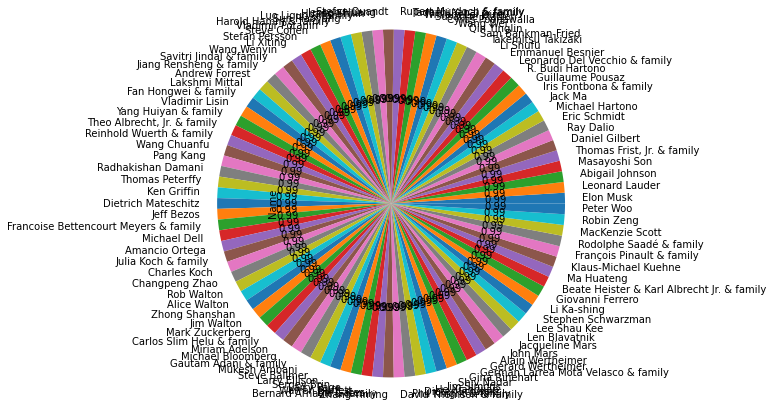

In [146]:
df_richest['Name'].value_counts().plot(kind='pie',autopct='%.2f',radius=2)
plt.show()

In [151]:
grp = df_me.groupby('Source')
grp.get_group('Google')

,Name,NetWorth,Age,Country/Territory,Source,Industry
5,Larry Page,111.0000,49,United States,Google,Technology
6,Sergey Brin,107.0000,48,United States,Google,Technology
69,Eric Schmidt,22.1000,66,United States,Google,Technology
101,babarehner,0.0001,30,United States,Google,Technology
